In [4]:
#Examine clinic appointment attendance patterns to understand no-show behavior across days of the week and departments.
import pandas as pd
df=pd.read_csv("clinic_appointments.csv")
df.head(10)


,Patient_ID,Age,Gender,Appointment_Date,Day_of_Week,Appointment_Time,Department,No_Show,Waiting_Time_Minutes
0,1,15,Female,2026-02-17,Tuesday,12:15,Pediatrics,Yes,18
1,2,70,Female,2026-02-07,Thursday,08:00,General,No,69
2,3,78,Female,2026-02-05,Thursday,11:45,Pediatrics,No,40
3,4,1,Female,2026-02-14,Thursday,13:30,Pediatrics,No,48
4,5,14,Female,2026-01-25,Monday,13:30,Eye Clinic,No,10
5,6,59,Female,2026-03-01,Thursday,09:30,Eye Clinic,No,51
6,7,74,Female,2026-02-15,Monday,08:15,Maternity,No,34
7,8,13,Male,2026-01-18,Thursday,13:15,Maternity,No,90
8,9,35,Female,2026-02-08,Tuesday,16:15,Pediatrics,No,39
9,10,72,Female,2026-02-13,Friday,13:00,Pediatrics,No,45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            100 non-null    int64 
 1   Age                   100 non-null    int64 
 2   Gender                100 non-null    object
 3   Appointment_Date      100 non-null    object
 4   Day_of_Week           100 non-null    object
 5   Appointment_Time      100 non-null    object
 6   Department            100 non-null    object
 7   No_Show               100 non-null    object
 8   Waiting_Time_Minutes  100 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Patient_ID,Age,Waiting_Time_Minutes
count,100.000000,100.000000,100.000000
mean,50.500000,42.340000,44.630000
std,29.011492,23.287496,23.861407
min,1.000000,1.000000,7.000000
25%,25.750000,20.000000,22.750000
50%,50.500000,44.000000,44.500000
75%,75.250000,61.250000,63.000000
max,100.000000,80.000000,90.000000


In [7]:
df.isnull()

,Patient_ID,Age,Gender,Appointment_Date,Day_of_Week,Appointment_Time,Department,No_Show,Waiting_Time_Minutes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False


In [14]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Appointment_Date        object
Day_of_Week             object
Appointment_Time        object
Department              object
No_Show                 object
Waiting_Time_Minutes     int64
dtype: object

In [15]:
df.drop_duplicates()

,Patient_ID,Age,Gender,Appointment_Date,Day_of_Week,Appointment_Time,Department,No_Show,Waiting_Time_Minutes
0,1,15,Female,2026-02-17,Tuesday,12:15,Pediatrics,Yes,18
1,2,70,Female,2026-02-07,Thursday,08:00,General,No,69
2,3,78,Female,2026-02-05,Thursday,11:45,Pediatrics,No,40
3,4,1,Female,2026-02-14,Thursday,13:30,Pediatrics,No,48
4,5,14,Female,2026-01-25,Monday,13:30,Eye Clinic,No,10
...,...,...,...,...,...,...,...,...,...
95,96,76,Male,2026-01-20,Tuesday,08:00,Pediatrics,No,38
96,97,11,Female,2026-01-16,Friday,10:00,Pediatrics,Yes,62
97,98,77,Male,2026-01-19,Monday,08:15,Maternity,No,63
98,99,10,Female,2026-03-01,Wednesday,11:45,General,No,87


In [21]:
import numpy as np
np.mean(df["Waiting_Time_Minutes"])


np.float64(44.63)

In [20]:
np.median(df["Waiting_Time_Minutes"])

np.float64(44.5)

In [22]:
np.min(df["Waiting_Time_Minutes"])

7

In [23]:
np.max(df["Waiting_Time_Minutes"])

90

In [42]:
#droup by no show
df["No_Show"].value_counts()

No_Show
No     80
Yes    20
Name: count, dtype: int64

In [46]:
#NO SHOW RATE
df["No_Show"].value_counts(normalize=True)*100

No_Show
No     80.0
Yes    20.0
Name: proportion, dtype: float64

In [47]:
#no show by departments
df["No_Show"].value_counts(["Department"])

No_Show
No     0.8
Yes    0.2
Name: proportion, dtype: float64

In [51]:
#No show per department
df.groupby(["Department","No_Show"]).size()

Department  No_Show
Dental      No          9
            Yes         5
Eye Clinic  No         20
            Yes         4
General     No         13
            Yes         1
Maternity   No         12
            Yes         2
Pediatrics  No         26
            Yes         8
dtype: int64

In [54]:
#No show rate per department
df.groupby(["Department"])["No_Show"].value_counts(normalize=True)*100

Department  No_Show
Dental      No         64.285714
            Yes        35.714286
Eye Clinic  No         83.333333
            Yes        16.666667
General     No         92.857143
            Yes         7.142857
Maternity   No         85.714286
            Yes        14.285714
Pediatrics  No         76.470588
            Yes        23.529412
Name: proportion, dtype: float64

In [52]:
#no show by day
df.groupby(["Day_of_Week","No_Show"]).size()

Day_of_Week  No_Show
Friday       No         12
             Yes         5
Monday       No         22
             Yes         6
Thursday     No         18
             Yes         3
Tuesday      No         12
             Yes         5
Wednesday    No         16
             Yes         1
dtype: int64

In [55]:
#no show rate by day
df.groupby(["Day_of_Week"])["No_Show"].value_counts(normalize=True)*100

Day_of_Week  No_Show
Friday       No         70.588235
             Yes        29.411765
Monday       No         78.571429
             Yes        21.428571
Thursday     No         85.714286
             Yes        14.285714
Tuesday      No         70.588235
             Yes        29.411765
Wednesday    No         94.117647
             Yes         5.882353
Name: proportion, dtype: float64

In [56]:
#plotting a graph of no show rate by day of week calculate no show percent
no_show_percent=(df.groupby(["Day_of_Week"])["No_Show"].value_counts(normalize=True).unstack()*100)
No_Show_rate=no_show_percent["Yes"]

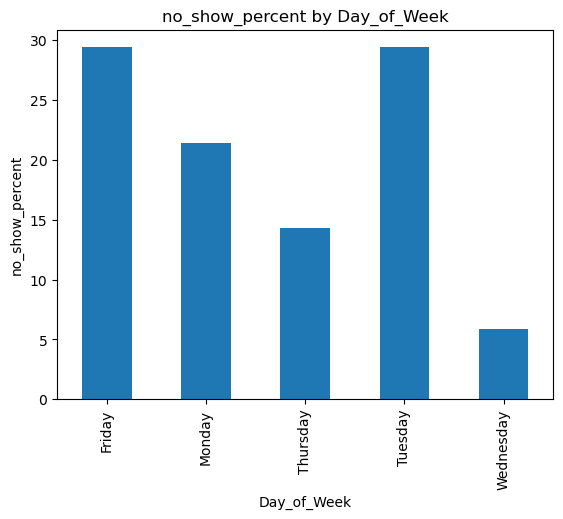

In [58]:
import matplotlib.pyplot as plt
plt.figure()
No_Show_rate.plot(kind="bar")
plt.xlabel("Day_of_Week")
plt.ylabel("no_show_percent")
plt.title("no_show_percent by Day_of_Week")
plt.show()
                  

In [59]:
#plotting a graph of no show rate by department calculate no show percent
no_show_percent=(df.groupby(["Department"])["No_Show"].value_counts(normalize=True).unstack()*100)
No_Show_rate=no_show_percent["Yes"]

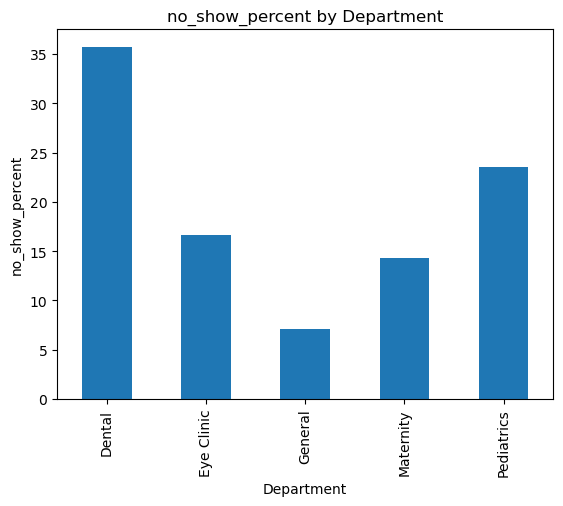

In [60]:
plt.figure()
No_Show_rate.plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("no_show_percent")
plt.title("no_show_percent by Department")
plt.show()

In [ ]:
#Key findings
-Overall no-show rate is 20%
No_Show      Percentage
No           80.0
Yes          20.0
-Dental department has the highest no-show rate ,followed by pediatris department
-General departmant has the lowest no-show rate. 
-The high now shows in dental may be because most dental issues are not emergencies while in pediatrics it may be because of child illness variability.
 Department  No_Show    NO SHOW RATE
 Dental      No         64.285714
            Yes        35.714286
Eye Clinic  No         83.333333
            Yes        16.666667
General     No         92.857143
            Yes         7.142857
Maternity   No         85.714286
            Yes        14.285714
Pediatrics  No         76.470588
            Yes        23.529412
-There is high no-show rates on Tuesdays and Fridays,while wednesday has the lowest no-show rate.

 Day_of_Week  No_Show    NO SHOW RATE

Friday       No         70.588235
             Yes        29.411765
Monday       No         78.571429
             Yes        21.428571
Thursday     No         85.714286
             Yes        14.285714
Tuesday      No         70.588235
             Yes        29.411765
Wednesday    No         94.117647
             Yes         5.882353

#RECOMMENDATIONS
-Implement reminder calls for dental and pediatrics departments.
-Investigate practices leading to low no sow rates and replicate them across departments.
-Consider scheduling or double booking on Fridays and Tuesdays
